In [ ]:
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import glob
import skimage.io as io

import numpy as np
from skimage import filters
from skimage.filters import threshold_multiotsu
import cv2
from skimage.morphology import disk

folder_path = r'/content/drive/MyDrive/PelegLab/picspots'

# load file paths from chosen folder into a list
path_list = glob.glob(f'{folder_path}/*.*') #Rerurns a list of file names
#path_list contains 2149 items instead of 2400, probably mot every birep has 8 tecrep.
path_list.sort()

names = []
for path in path_list:
  name = path.replace('/content/drive/MyDrive/PelegLab/picspots/', "")
  names.append(name)

file_names = []
for i in names:
  name = i.replace('.JPG', "")
  file_names.append(name)

In [ ]:
###!!!DO NOT EXECUTE!!!
#Now let us load each file at a time...
image_list=[]  # Empty list to store images from the folder.
for path in path_list[0:]:   #Iterate through each file in the list using for
    img = io.imread(path)  # now, we can read each file since we have the full path
    image_list.append(img)  #Create a list of images (not just file names but full images)

KeyboardInterrupt: ignored

In [ ]:
print(path_list[2100:2149])

['/content/drive/MyDrive/PelegLab/picspots/92 (8).JPG', '/content/drive/MyDrive/PelegLab/picspots/93 (1).JPG', '/content/drive/MyDrive/PelegLab/picspots/93 (2).JPG', '/content/drive/MyDrive/PelegLab/picspots/93 (3).JPG', '/content/drive/MyDrive/PelegLab/picspots/93 (4).JPG', '/content/drive/MyDrive/PelegLab/picspots/93 (5).JPG', '/content/drive/MyDrive/PelegLab/picspots/93 (6).JPG', '/content/drive/MyDrive/PelegLab/picspots/93 (7).JPG', '/content/drive/MyDrive/PelegLab/picspots/93 (8).JPG', '/content/drive/MyDrive/PelegLab/picspots/94 (1).JPG', '/content/drive/MyDrive/PelegLab/picspots/94 (2).JPG', '/content/drive/MyDrive/PelegLab/picspots/94 (3).JPG', '/content/drive/MyDrive/PelegLab/picspots/94 (4).JPG', '/content/drive/MyDrive/PelegLab/picspots/94 (5).JPG', '/content/drive/MyDrive/PelegLab/picspots/94 (6).JPG', '/content/drive/MyDrive/PelegLab/picspots/94 (7).JPG', '/content/drive/MyDrive/PelegLab/picspots/94 (8).JPG', '/content/drive/MyDrive/PelegLab/picspots/95 (1).JPG', '/content

In [ ]:
s=2100
t = 2149
gray_image_list = []
for path in path_list[s:t]:   #Iterate through each file in the list using for
    img = io.imread(path, as_gray = True)  # now, we can read each file since we have the full path
    gray_image_list.append(img)  #Create a list of images (not just file names but full images)

roots_image_list = []
for i, image in enumerate(gray_image_list):
  ret, thresh = cv2.threshold(gray_image_list[i], 0.92, 1, cv2.THRESH_BINARY) #thresholding the "i"th image
  roots_image_list.append(thresh)

median_filterd_image = []
for i, roots in enumerate(roots_image_list):
  neighborhood = disk(radius = 2)
  median = filters.rank.median(roots_image_list[i], neighborhood)
  median_filterd_image.append(median)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactives

In [ ]:
########histograms
for i, image in enumerate(gray_image_list):
  plt.figure(figsize = (30,30))
  plt.subplot(20,1,i+1)
  hist = plt.hist(image.flatten(), bins = 256, color = 'g')
  plt.title(file_names[i])



In [ ]:
################check the difference before and after median filter
check = 10
print(np.count_nonzero(median_filterd_image[check]))
print(np.count_nonzero(roots_image_list[check]))

40503
55465


In [ ]:
total_pixle = []
for bimage in median_filterd_image:
  pcount = np.count_nonzero(bimage[0:2400])
  total_pixle.append(pcount)

lower_pixle = []
for bimage in median_filterd_image:
  pcount = np.count_nonzero(bimage[1600:2400])
  lower_pixle.append(pcount)

midle_pixle = []
for bimage in median_filterd_image:
  pcount = np.count_nonzero(bimage[800:1600])
  midle_pixle.append(pcount)

upper_pixle = []
for bimage in median_filterd_image:
  pcount = np.count_nonzero(bimage[0:800])
  upper_pixle.append(pcount)

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(file_names[s:t], lower_pixle, midle_pixle, upper_pixle, total_pixle)), columns = ['genotype', 'low', 'middle', 'upper', 'total'])
df.to_csv('OR2100-2149.csv')


In [ ]:
#########check to see if השלם שווה לסכום חלקיו
check = 10
lower_pixle[check]+midle_pixle[check]+upper_pixle[check]==total_pixle[check]

True

Text(0.5, 1.0, 'rgb')

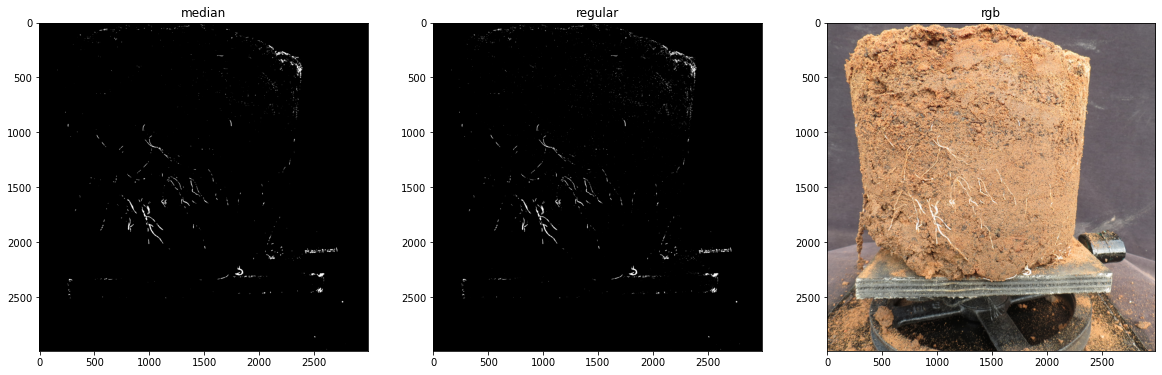

In [ ]:
################check to see quality of filtering
check = 10
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(median_filterd_image[check], cmap = 'gray')
plt.title('median')
plt.subplot(1,3,2)
plt.imshow(roots_image_list[check], cmap = 'gray')
plt.title('regular')
plt.subplot(1,3,3)
plt.imshow(image_list[check])
plt.title('rgb')

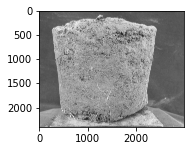

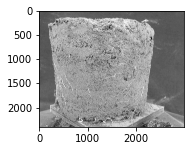

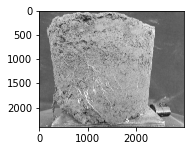

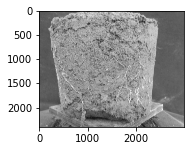

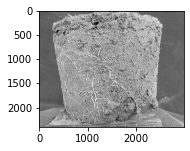

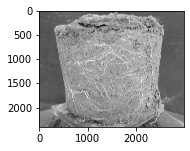

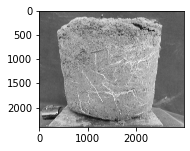

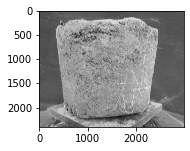

In [ ]:
##################check to see where to cut
##################desided 0-800, 800-1600, 1600-2400
for i, image in enumerate(gray_image_list[8:16]):
  plt.figure(figsize = (20,20))
  plt.subplot(8, 1, i+1)
  plt.imshow(image[0:2400], cmap = 'gray')

ValueError: ignored

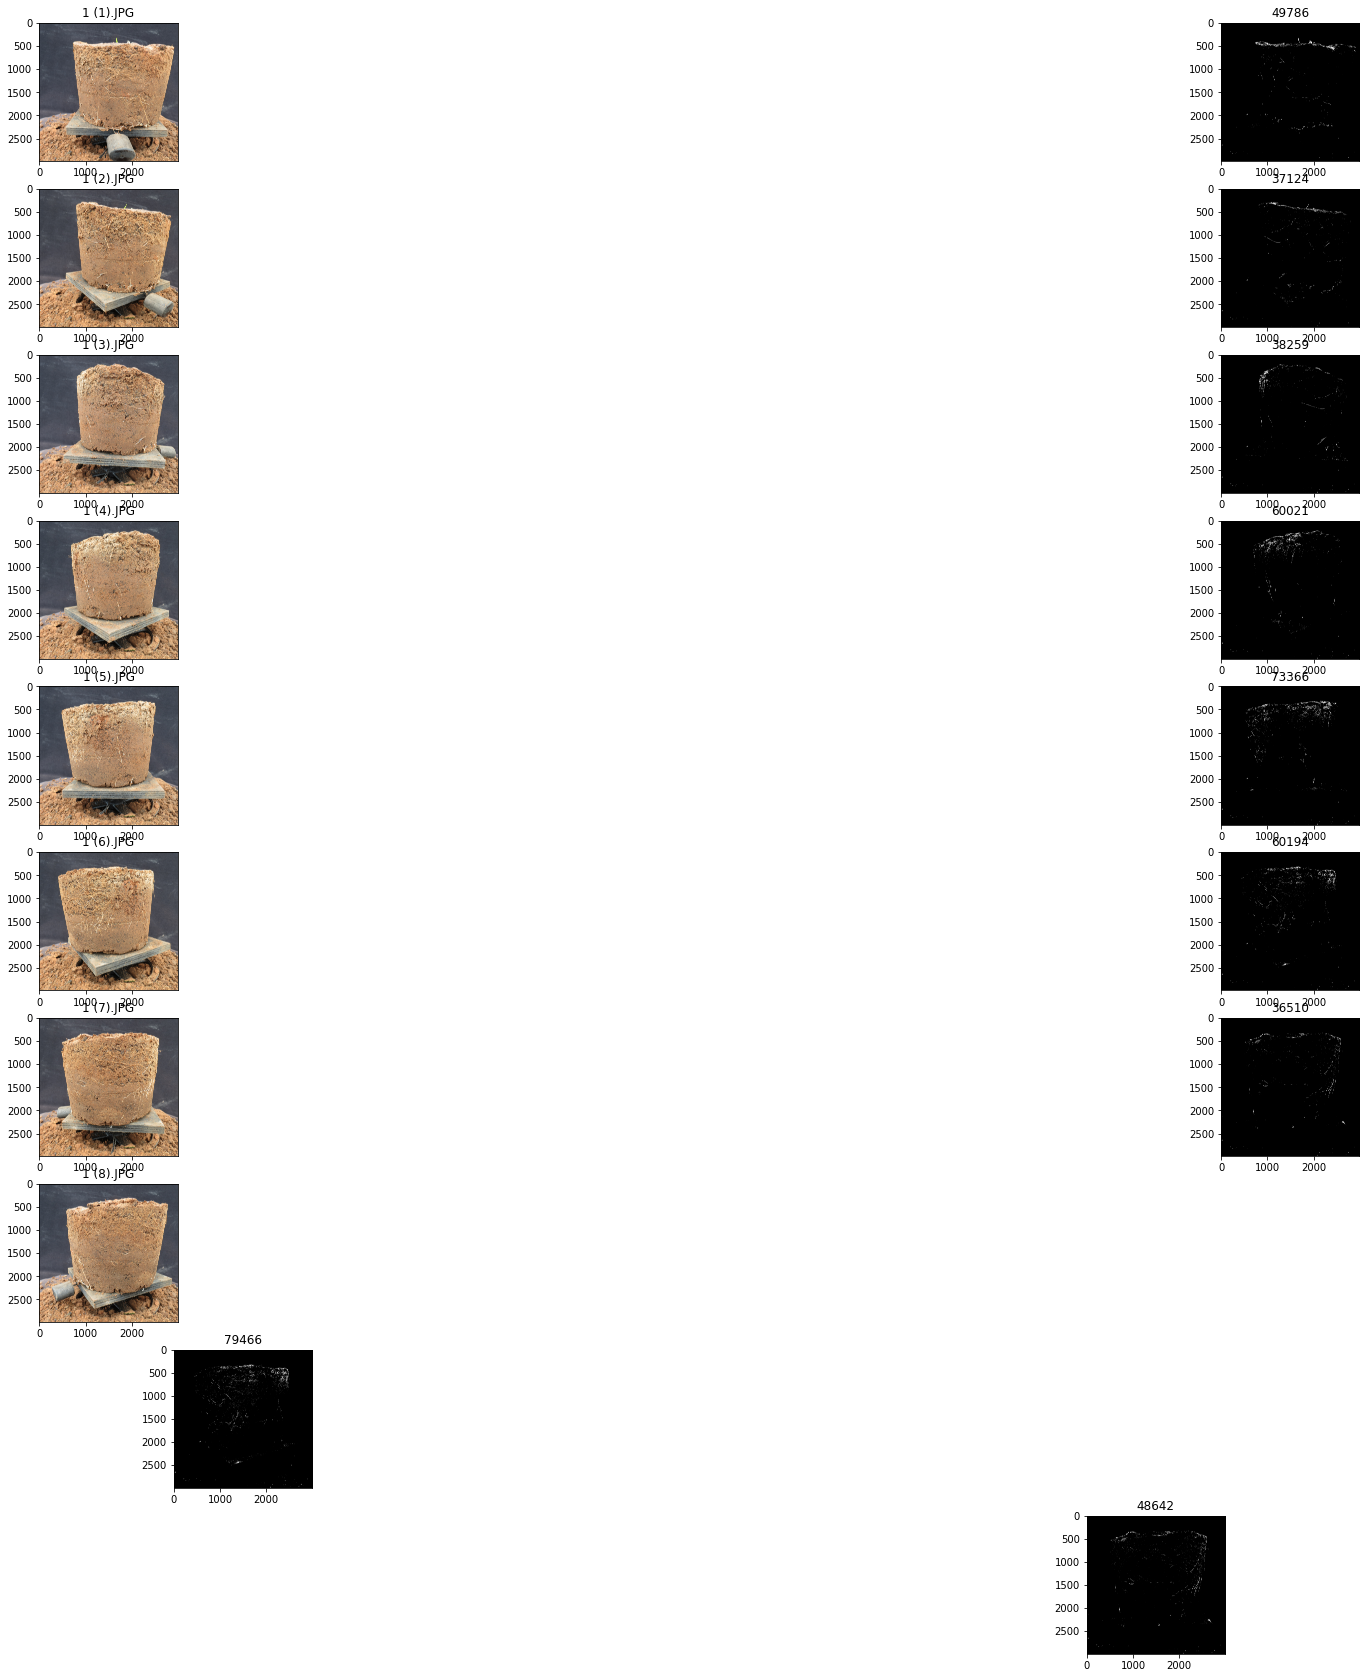

In [ ]:
##########################################################################
plt.figure(figsize = (30,30))
plt.tight_layout() # nicer layout
position = 1 #determin the position where the image will be printed
counter = 0  #each list contains 10 images' the counter iterates them
while counter<9:
  plt.subplot(10,3,position)
  plt.imshow(image_list[counter]) #takes the "counter"th image from image_list
  plt.title(file_names[counter])
  position+=1 #the second column

  plt.subplot(10,2,position)
  ret, thresh = cv2.threshold(gray_image_list[counter], 0.92, 1, cv2.THRESH_BINARY) #thresholding the "counter"th image
  pcount = np.count_nonzero(thresh)
  plt.imshow(thresh, cmap='gray')
  plt.title(pcount)
  position+=1

  plt.subplot(10,3,position)
  neighborhood = disk(radius = 2)
  median = filters.rank.median(thresh, neighborhood)
  pcount = np.count_nonzero(median)
  plt.imshow(median, cmap = 'gray')
  plt.title(pcount)
  position += 1
  counter+=1

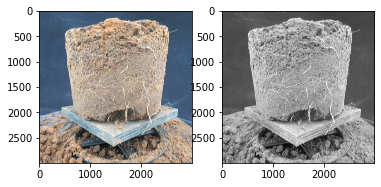

In [ ]:
gray_image = io.imread(f'{folder_path}/13 (4).JPG', as_gray = True)
rgb_image = io.imread((f'{folder_path}/13 (4).JPG'))
plt.subplot(1,2,1)
plt.imshow(rgb_image)
plt.subplot(1,2,2)
plt.imshow(gray_image, cmap = 'gray')

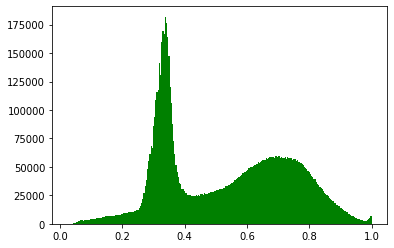

In [ ]:
hist = plt.hist(gray_image.flatten(), bins = 256, color = 'g')

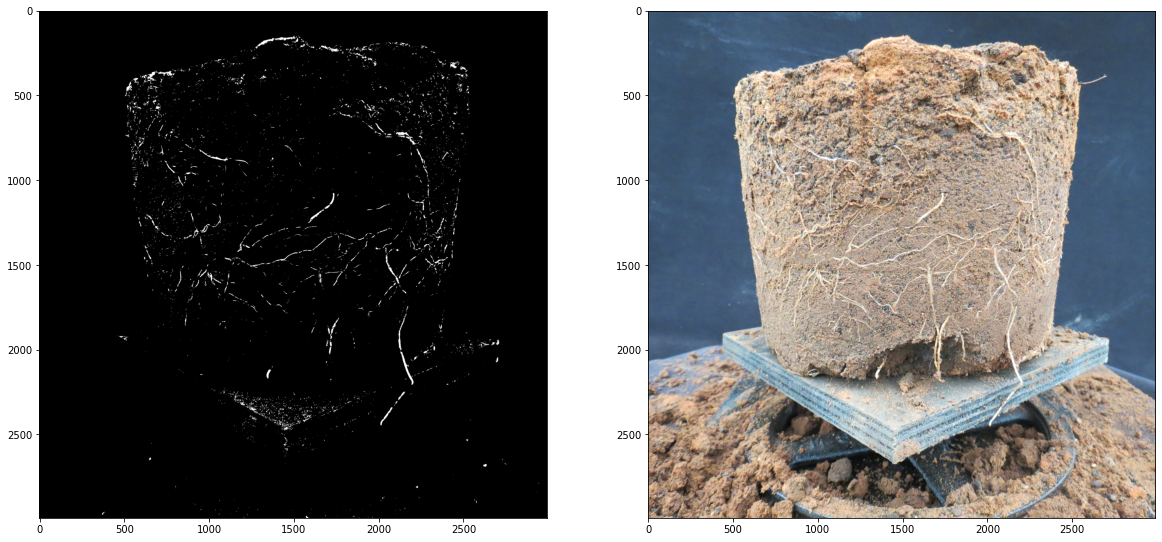

In [ ]:
import numpy as np
from skimage import filters
from skimage.filters import threshold_multiotsu
import cv2


ret, thresh1 = cv2.threshold(gray_image, 0.92, 1, cv2.THRESH_BINARY)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.imshow(thresh1, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(rgb_image)

Text(0.5, 1.0, 'regular')

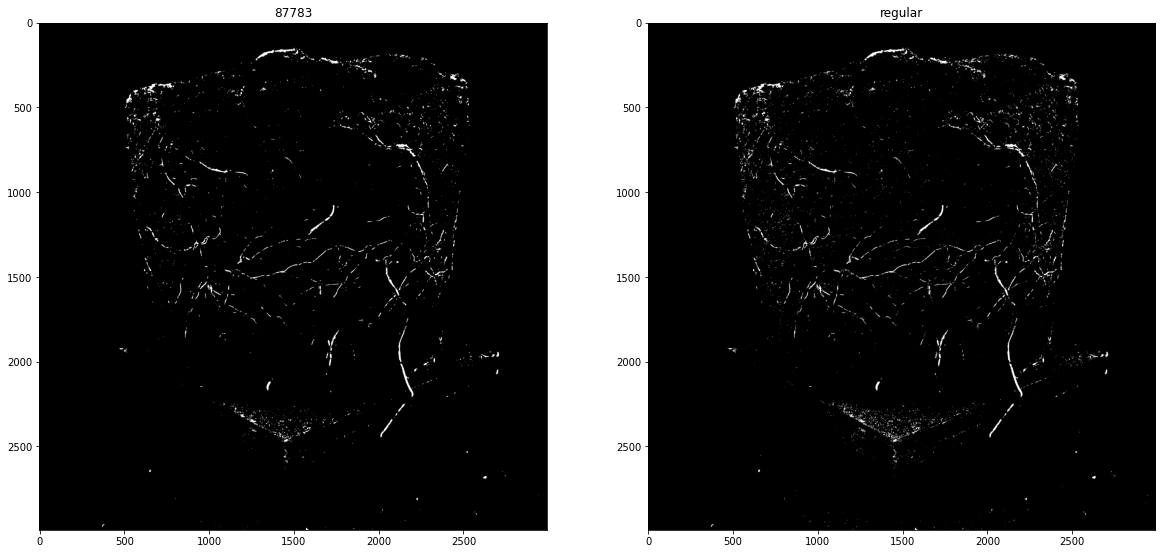

In [ ]:
from skimage.morphology import disk
neighborhood = disk(radius = 2)
median = filters.rank.median(thresh1, neighborhood)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
pixle_count = np.count_nonzero(median)
plt.imshow(median, cmap = 'gray')
plt.title(pixle_count)
plt.subplot(1,2,2)
pixle = np.count_nonzero(thresh1)
plt.imshow(thresh1, cmap = 'gray')
plt.title('regular')

In [ ]:
pixle_count = np.count_nonzero(median)

pixle = np.count_nonzero(thresh1)

print(pixle_count, pixle)

87783 109890


76926